In [36]:
!pip install matplotlib
!pip install mysql-connector-python
!pip install pandas
!pip install openpyxl
!pip install seaborn
!pip install --upgrade pandas

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ----------- ---------------------------- 81.9/294.9 kB 1.5 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 3.6 MB/s eta 0:00:00
Defaulting to user installation because normal site-packages is not writeable


In [40]:
import matplotlib.pyplot as plt
import mysql.connector
import pandas as pd
import seaborn as sns
import datetime

In [5]:
conn = mysql.connector.connect(user="root", password="root", host="localhost")
cursor=conn.cursor()
query="CREATE DATABASE lucky_cherry"
cursor.execute(query)

conn.close()

In [6]:
conn = mysql.connector.connect(user="root", password="root", host="localhost", database="lucky_cherry")
cursor=conn.cursor()
query="""
CREATE TABLE lucky_cherry.clientes(
    ID VARCHAR(255),
    Nombre_completo VARCHAR(255),
    Fecha_de_nacimiento DATE,
    Direccion VARCHAR(255),
    Localidad_y_Codigo_postal VARCHAR(255),
    Telefono VARCHAR(255),
    Correo_electronico VARCHAR(255),
    Fecha_de_alta DATETIME,
    Grupo_de_clientes CHAR(1),
    PRIMARY KEY (ID)
);
"""
cursor.execute(query)
conn.commit()
conn.close()

In [7]:
conn = mysql.connector.connect(user="root", password="root", host="localhost", database="lucky_cherry")
cursor=conn.cursor()
query="SHOW TABLES"
cursor.execute(query)
for x in cursor:
    print(x)
conn.close()

('clientes',)


In [31]:
# Carga de datos
clientes_df = pd.read_excel('D:/kudo-kun/Especializacion big data/GESTIÓN Y ALMACENAMIENTO DE DATOS/Proyecto/Entrega2/Clientes.xlsx')

# Limpieza de datos (Ejemplo básico)
clientes_df.drop_duplicates(inplace=True)
clientes_df.dropna(subset=['ID'], inplace=True)

# Convertir columnas de fecha/hora a string
clientes_df['Fecha de nacimiento'] = clientes_df['Fecha de nacimiento'].dt.strftime('%Y-%m-%d')
clientes_df['Fecha de alta'] = clientes_df['Fecha de alta'].dt.strftime('%Y-%m-%d %H:%M:%S')

print(clientes_df.columns)

Index(['ID', 'Nombre completo', 'Fecha de nacimiento', 'Dirección',
       'Localidad y Código postal', 'Teléfono', 'Correo electrónico',
       'Fecha de alta', 'Grupo de clientes'],
      dtype='object')


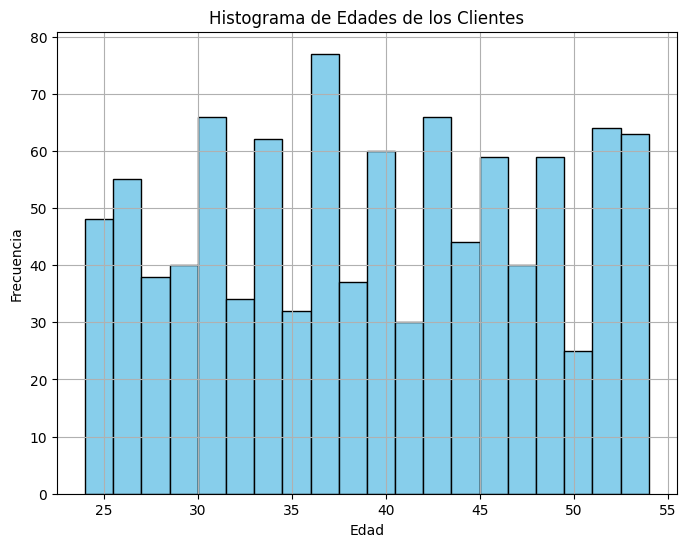

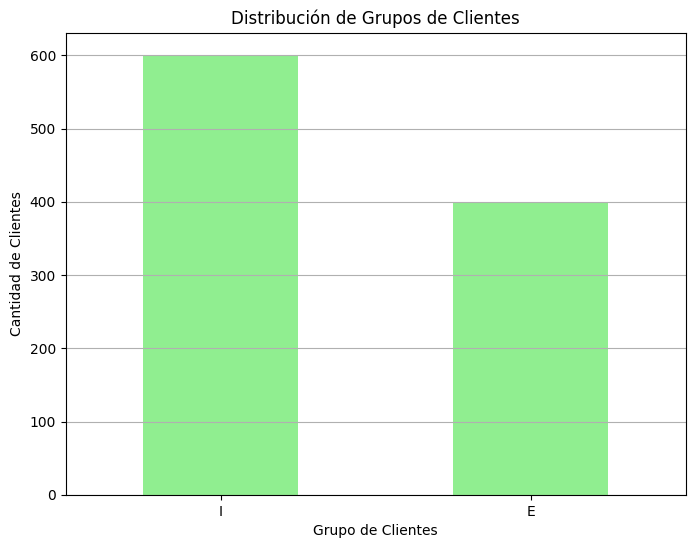

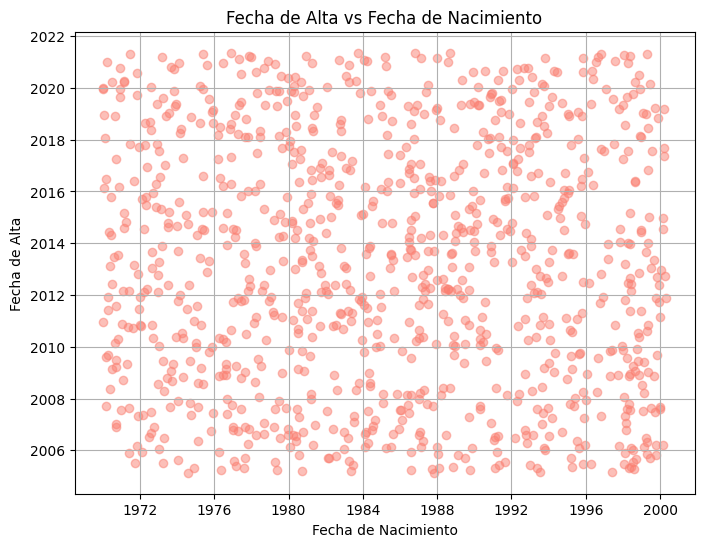

In [43]:
# crear una copia independiente del DataFrame original
df_copia = clientes_df.copy()

# convertir las columnas de fechas al formato adecuado
df_copia['Fecha de nacimiento'] = pd.to_datetime(df_copia['Fecha de nacimiento'], format='%Y-%m-%d')
# Para 'Fecha de alta' que incluye tanto fecha como hora
df_copia['Fecha de alta'] = pd.to_datetime(df_copia['Fecha de alta'], format='%Y-%m-%d %H:%M:%S')


# imputar valores faltantes en todas las columnas con el valor más frecuente
for columna in df_copia.columns:
    valor_mas_frecuente = df_copia[columna].mode()[0]
    df_copia[columna] = df_copia[columna].fillna(valor_mas_frecuente)
    
# eliminar duplicados en todo el DataFrame
df_copia.drop_duplicates(inplace=True)

# estandarizar formatos de datos en todas las columnas (por ejemplo, convertir todas las direcciones a mayúsculas)
for columna in df_copia.columns:
    if df_copia[columna].dtype == 'object':  # Si la columna contiene cadenas de texto
        df_copia[columna] = df_copia[columna].str.upper()  # Convertir todas las cadenas de texto a mayúsculas

# Calcular la edad de los clientes a partir de la fecha de nacimiento
hoy = datetime.datetime.today()
df_copia['Edad'] = hoy.year - df_copia['Fecha de nacimiento'].dt.year

# Filtrar clientes con edades poco comunes (por ejemplo, menores de 18 años o mayores de 100 años)
df_filtrado = df_copia[(df_copia['Edad'] >= 18) & (df_copia['Edad'] <= 100)]

# Histograma de edades de los clientes
plt.figure(figsize=(8, 6))
plt.hist(df_copia['Edad'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma de Edades de los Clientes')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# Gráfico de barras de distribución de grupos de clientes
plt.figure(figsize=(8, 6))
df_copia['Grupo de clientes'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Distribución de Grupos de Clientes')
plt.xlabel('Grupo de Clientes')
plt.ylabel('Cantidad de Clientes')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

# Diagrama de dispersión de fecha de alta vs fecha de nacimiento
plt.figure(figsize=(8, 6))
plt.scatter(df_copia['Fecha de nacimiento'], df_copia['Fecha de alta'], color='salmon', alpha=0.5)
plt.title('Fecha de Alta vs Fecha de Nacimiento')
plt.xlabel('Fecha de Nacimiento')
plt.ylabel('Fecha de Alta')
plt.grid(True)
plt.show()

In [44]:
df_copia.to_csv('D:/kudo-kun/Especializacion big data/GESTIÓN Y ALMACENAMIENTO DE DATOS/Proyecto/Entrega2/clientes_limpios.csv', index=False)

In [46]:
from datetime import datetime as dt
# Asumiendo que ya tienes la conexión y el cursor creados como lo mencionaste
conn = mysql.connector.connect(user="root", password="root", host="localhost", database="lucky_cherry")
cursor = conn.cursor()

# Preparar la instrucción SQL INSERT
insert_query = """
INSERT INTO clientes (ID, Nombre_completo, Fecha_de_nacimiento, Direccion, Localidad_y_Codigo_postal, Telefono, Correo_electronico, Fecha_de_alta, Grupo_de_clientes)
VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s)
"""

# Iterar sobre el DataFrame df_copia y ejecutar la instrucción SQL para cada fila
for row in df_copia.itertuples(index=False):
    # Verificar si la fecha de nacimiento es una instancia de datetime antes de convertir
    fecha_nacimiento = row[2].strftime('%Y-%m-%d') if isinstance(row[2], dt) else row[2]
    fecha_alta = row[7].strftime('%Y-%m-%d %H:%M:%S') if isinstance(row[7], dt) else row[7]
    
    values = (
        row[0],  # ID
        row[1],  # Nombre completo
        fecha_nacimiento,  # Fecha de nacimiento
        row[3],  # Dirección
        row[4],  # Localidad y Código postal
        row[5],  # Teléfono
        row[6],  # Correo electrónico
        fecha_alta,  # Fecha de alta
        row[8],  # Grupo de clientes
    )
    
    cursor.execute(insert_query, values)

# Confirmar la inserción de datos y cerrar la conexión
conn.commit()
cursor.close()
conn.close()



IntegrityError: 1062 (23000): Duplicate entry 'C0001' for key 'clientes.PRIMARY'

Insertar datos

In [51]:
# Conectar a la base de datos
conn = mysql.connector.connect(user="root", password="root", host="localhost", database="lucky_cherry")
cursor = conn.cursor()

# Ejemplo de datos a insertar
datos_cliente = {
    'ID': 'C0010',
    'Nombre_completo': 'Juan Pérez',
    'Fecha_de_nacimiento': '1990-01-01',
    'Direccion': '123 Calle Ficticia',
    'Localidad_y_Codigo_postal': 'Ciudad, 00000',
    'Telefono': '1234567890',
    'Correo_electronico': 'juan.perez@example.com',
    'Fecha_de_alta': '2024-01-01 00:00:00',
    'Grupo_de_clientes': 'A'
}

# Preparar la consulta INSERT
columnas = ', '.join(datos_cliente.keys())
valores_placeholders = ', '.join(['%s'] * len(datos_cliente))
valores = tuple(datos_cliente.values())

insert_query = f"INSERT INTO clientes ({columnas}) VALUES ({valores_placeholders})"

# Ejecutar la consulta
cursor.execute(insert_query, valores)

# Confirmar la inserción
conn.commit()

# Cerrar la conexión
cursor.close()
conn.close()




ModuleNotFoundError: No module named 'sqlalchemy'

leer datos

In [52]:
def leer_datos(query, conn):
    cursor = conn.cursor()
    cursor.execute(query)
    
    # Extraer datos
    rows = cursor.fetchall()
    if rows:
        # Extraer los nombres de las columnas
        column_names = [i[0] for i in cursor.description]
        # Crear DataFrame
        df = pd.DataFrame(rows, columns=column_names)
        return df
    else:
        return pd.DataFrame()

# Usar la función
conn = mysql.connector.connect(user="root", password="root", host="localhost", database="lucky_cherry")
df = leer_datos("SELECT * FROM clientes", conn)
conn.close()

print(df.head())


      ID                   Nombre_completo Fecha_de_nacimiento  \
0  C0001            Leandra Anna Malo Alba          1984-12-08   
1  C0002           Severo Granados Iglesia          1986-08-12   
2  C0003                 Lucho Andreu Amat          1990-04-16   
3  C0004  Matías Mauricio Castillo Barrera          1996-12-02   
4  C0005        Mauricio Guijarro Castelló          1984-05-14   

              Direccion Localidad_y_Codigo_postal        Telefono  \
0  7943 S. Fifth Street     Bergenfield, NJ 07621  (598) 451-5865   
1        77 Lyme Street       Hermitage, TN 37076  (869) 771-1487   
2    9448 Fairfield St.        Aberdeen, SD 57401  (246) 245-7306   
3      8143 College St.      Trussville, AL 35173  (707) 933-2513   
4     9893 W. Vale Ave.        Billings, MT 59101  (612) 325-0216   

      Correo_electronico       Fecha_de_alta Grupo_de_clientes  
0         uraeus@mac.com 2012-01-19 14:32:31                 I  
1           bhima@me.com 2005-03-22 15:42:12              

Actualizar datos

In [53]:
# Conectar a la base de datos
conn = mysql.connector.connect(user="root", password="root", host="localhost", database="lucky_cherry")
cursor = conn.cursor()

# Actualizar datos
update_query = "UPDATE clientes SET Direccion = %s WHERE ID = %s"
new_address = 'Nueva Direccion 456'
client_id = 'C0010'

cursor.execute(update_query, (new_address, client_id))
conn.commit()

# Confirmar la actualización
print(f"Se han actualizado los datos del cliente con ID '{client_id}'. Nueva dirección: '{new_address}'")

# Cerrar la conexión
cursor.close()
conn.close()

Se han actualizado los datos del cliente con ID 'C0010'. Nueva dirección: 'Nueva Direccion 456'


Eliminar datos

In [54]:
# Conectar a la base de datos
conn = mysql.connector.connect(user="root", password="root", host="localhost", database="lucky_cherry")
cursor = conn.cursor()

# Eliminar datos
delete_query = "DELETE FROM clientes WHERE ID = %s"
client_id = 'C0010'

cursor.execute(delete_query, (client_id,))
conn.commit()

# Confirmar la eliminación
print(f"Se han eliminado los datos del cliente con ID '{client_id}'")

# Cerrar la conexión
cursor.close()
conn.close()


Se han eliminado los datos del cliente con ID 'C0010'


Visualizar datos

C:\Users\locur\AppData\Local\Temp\ipykernel_18400\2683423713.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  clientes_df = pd.read_sql(query, conn)


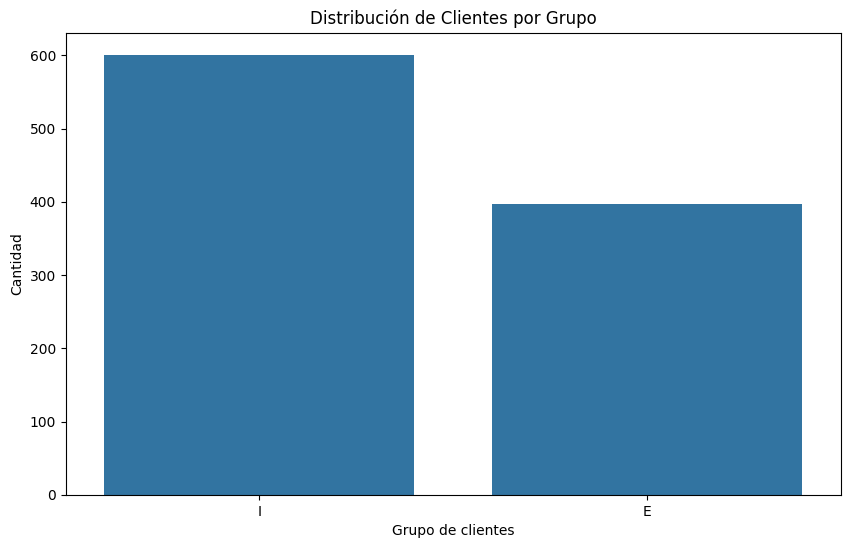

In [55]:
# Conectar a la base de datos
conn = mysql.connector.connect(user="root", password="root", host="localhost", database="lucky_cherry")

# Consulta para recuperar datos de la tabla clientes
query = "SELECT * FROM clientes"
clientes_df = pd.read_sql(query, conn)

# Mostrar visualizaciones
plt.figure(figsize=(10, 6))
sns.countplot(data=clientes_df, x='Grupo_de_clientes')
plt.title('Distribución de Clientes por Grupo')
plt.xlabel('Grupo de clientes')
plt.ylabel('Cantidad')
plt.show()

# Cerrar la conexión
conn.close()

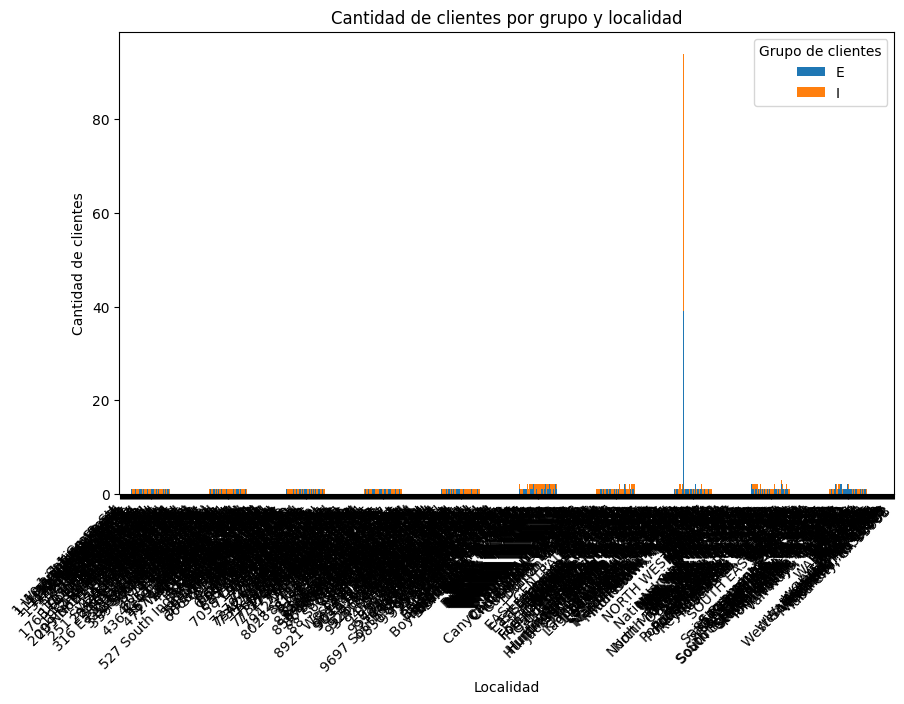

In [57]:
# Establecer conexión con la base de datos
conn = mysql.connector.connect(user="root", password="root", host="localhost", database="lucky_cherry")
cursor = conn.cursor()

# Consulta SQL para obtener la cantidad de clientes por grupo y localidad
query = """
    SELECT Localidad_y_Codigo_postal, Grupo_de_clientes, COUNT(*) AS Cantidad
    FROM clientes
    GROUP BY Localidad_y_Codigo_postal, Grupo_de_clientes
"""

# Ejecutar la consulta y obtener los resultados
cursor.execute(query)
result = cursor.fetchall()

# Cerrar la conexión
conn.close()

# Crear un DataFrame a partir de los resultados
df = pd.DataFrame(result, columns=['Localidad', 'Grupo', 'Cantidad'])

# Pivotear el DataFrame para tener los grupos como columnas
pivot_df = df.pivot(index='Localidad', columns='Grupo', values='Cantidad').fillna(0)

# Crear el gráfico de barras apiladas
pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Cantidad de clientes por grupo y localidad')
plt.xlabel('Localidad')
plt.ylabel('Cantidad de clientes')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Grupo de clientes')
plt.show()

In [56]:
!mysqldump -u root -p lucky_cherry > lucky_cherry_backup.sql

"mysqldump" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
